In [ ]:
!pip install --upgrade pip
!pip install --upgrade setuptools wheel
!pip install --upgrade "mxnet<2.0.0"
!pip install --pre autogluon

In [ ]:
import pandas as pd
from collections import Counter

path = './drive/MyDrive/Materiale_Pellegrino_personal/CTU_Shuffled/CTU_Shuffled.csv'
dataset = pd.read_csv(path)

In [ ]:
dataset

,StartTime,Dur,Proto,Dir,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Details,multilabel
0,52:49.3,0.000540,1,<->,CON,0.0,0.0,2,131,71,flow=Background-UDP-Established,normal
1,58:54.5,0.014909,2,->,SRPA_FSPA,0.0,0.0,11,2882,1504,flow=Background-TCP-Established,normal
2,57:55.7,0.000798,1,<->,CON,0.0,0.0,2,244,182,flow=Background-UDP-Established,normal
3,56:16.4,15.302759,1,->,INT,0.0,NaN,4,336,336,flow=Background-UDP-Attempt,normal
4,53:17.7,7.843942,2,->,FSPA_SRPA,0.0,0.0,93,11846,4562,flow=Background-TCP-Established,normal
...,...,...,...,...,...,...,...,...,...,...,...,...
31468,00:19.1,8.917003,2,->,S_SA,0.0,0.0,8,512,194,flow=Background-TCP-Established,normal
31469,59:40.5,0.038780,1,<->,CON,0.0,0.0,2,191,68,flow=To-Background-UDP-CVUT-DNS-Server,normal
31470,58:04.2,603.106201,1,->,INT,0.0,NaN,6,552,552,flow=Background-Attempt-cmpgw-CVUT,normal
31471,00:22.8,0.000550,1,<->,CON,0.0,0.0,2,128,60,flow=Background-UDP-Established,normal


In [ ]:
print(Counter(dataset['multilabel']))

Counter({'normal': 31406, 'BotNet': 67})


### ***PRE-ELABORAZIONE DATI***

In [ ]:
dataset = dataset.drop('StartTime', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

# train 50% e test 50%
train, test = train_test_split(dataset, test_size=0.5)

print(len(train))
print(len(test))

15736
15737


In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder delle due variabili target, quindi da stringhe a interi sia in test che in train e salvo i valori nelle variabili y_test a y_train
# y_test viene utilizzata per la valutazione del modello

y_train = LabelEncoder().fit_transform(train['multilabel'])
y_test = LabelEncoder().fit_transform(test['multilabel'])


# sostituisco i valori originari con la codifica precedentemente fatta
target_index = train.columns.get_loc('multilabel')
train.iloc[:, target_index] = y_train

# elimino la colonna relativa al target nel dataset di test poiché non utile
test = test.drop('multilabel', axis=1)

In [ ]:
train.head()

,Dur,Proto,Dir,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Details,multilabel
10714,0.038630,1,<->,CON,0.0,0.0,2,228,79,flow=To-Background-UDP-CVUT-DNS-Server,1
4777,45.852188,2,->,S_SA,0.0,0.0,6,396,66,flow=Background-Established-cmpgw-CVUT,1
9054,0.203904,1,<->,CON,0.0,0.0,2,245,75,flow=To-Background-UDP-CVUT-DNS-Server,1
13262,1218.402100,1,<->,CON,0.0,0.0,647,548901,139070,flow=Background-Established-cmpgw-CVUT,1
1498,0.000258,1,->,INT,0.0,NaN,1,61,61,flow=Background-Attempt-cmpgw-CVUT,1


In [ ]:
test.head()

,Dur,Proto,Dir,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Details
8077,0.379806,2,->,FSPA_FSPA,0.0,0.0,9,1541,699,flow=Background-Established-cmpgw-CVUT
18792,0.000898,1,<->,CON,0.0,0.0,2,133,73,flow=Background-UDP-Established
3942,0.000771,1,<->,CON,0.0,0.0,2,543,76,flow=Background-UDP-Established
18614,0.000273,1,<->,CON,0.0,0.0,2,214,81,flow=To-Background-UDP-CVUT-DNS-Server
18027,0.854322,1,<->,CON,0.0,0.0,6,680,427,flow=Background-UDP-Established


### ***MODEL***

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pprint
import random
from autogluon.tabular import TabularPredictor
import mxnet as mx

In [ ]:
label = 'multilabel'

train_df = train
test_df = test

print('Number of training samples:', len(train_df))
print('Number of test samples:', len(test_df))

Number of training samples: 15736
Number of test samples: 15737


In [ ]:
test_df.head()

,Dur,Proto,Dir,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Details
8077,0.379806,2,->,FSPA_FSPA,0.0,0.0,9,1541,699,flow=Background-Established-cmpgw-CVUT
18792,0.000898,1,<->,CON,0.0,0.0,2,133,73,flow=Background-UDP-Established
3942,0.000771,1,<->,CON,0.0,0.0,2,543,76,flow=Background-UDP-Established
18614,0.000273,1,<->,CON,0.0,0.0,2,214,81,flow=To-Background-UDP-CVUT-DNS-Server
18027,0.854322,1,<->,CON,0.0,0.0,6,680,427,flow=Background-UDP-Established


In [ ]:
train_df.head()

,Dur,Proto,Dir,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Details,multilabel
10714,0.038630,1,<->,CON,0.0,0.0,2,228,79,flow=To-Background-UDP-CVUT-DNS-Server,1
4777,45.852188,2,->,S_SA,0.0,0.0,6,396,66,flow=Background-Established-cmpgw-CVUT,1
9054,0.203904,1,<->,CON,0.0,0.0,2,245,75,flow=To-Background-UDP-CVUT-DNS-Server,1
13262,1218.402100,1,<->,CON,0.0,0.0,647,548901,139070,flow=Background-Established-cmpgw-CVUT,1
1498,0.000258,1,->,INT,0.0,NaN,1,61,61,flow=Background-Attempt-cmpgw-CVUT,1


### ***TRAINING***

In [ ]:
from autogluon.tabular import TabularPredictor
predictor = TabularPredictor(label=label)

predictor.fit(train_df, hyperparameters='multimodal')

No path specified. Models will be saved in: "AutogluonModels/ag-20210622_100840/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20210622_100840/"
AutoGluon Version:  0.2.1b20210622
Train Data Rows:    15736
Train Data Columns: 10
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12685.04 MB
	Train Data (Original)  Memory Usage: 4.24 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify specia

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0             CatBoost   1.000000       0.009060   2.205362                0.009060           2.205362            1       True          3
1             LightGBM   1.000000       0.013462   0.816719                0.013462           0.816719            1       True          1
2  WeightedEnsemble_L2   1.000000       0.016881   1.393760                0.003419           0.577040            2       True          7
3           LightGBMXT   0.999365       0.015044   0.454961                0.015044           0.454961            1       True          2
4        LightGBMLarge   0.999365       0.016988   0.595540                0.016988           0.595540            1       True          6
5              XGBoost   0.999365       0.018446   1.252718                0.018446           1.252718        

{'leaderboard':                  model  score_val  ...  can_infer  fit_order
 0             CatBoost   1.000000  ...       True          3
 1             LightGBM   1.000000  ...       True          1
 2  WeightedEnsemble_L2   1.000000  ...       True          7
 3           LightGBMXT   0.999365  ...       True          2
 4        LightGBMLarge   0.999365  ...       True          6
 5              XGBoost   0.999365  ...       True          4
 6       NeuralNetMXNet   0.998094  ...       True          5
 
 [7 rows x 9 columns],
 'max_stack_level': 2,
 'model_best': 'WeightedEnsemble_L2',
 'model_fit_times': {'CatBoost': 2.205361843109131,
  'LightGBM': 0.8167192935943604,
  'LightGBMLarge': 0.5955395698547363,
  'LightGBMXT': 0.45496082305908203,
  'NeuralNetMXNet': 39.71160268783569,
  'WeightedEnsemble_L2': 0.577040433883667,
  'XGBoost': 1.2527177333831787},
 'model_hyperparams': {'CatBoost': {'allow_writing_files': False,
   'eval_metric': 'Accuracy',
   'iterations': 10000,
   '

### ***PREDICTION***

In [ ]:
""" Per la predizione e la valutazione uso solo la Rete Neurale tra tutti i modelli addestrati """

models = predictor.get_model_names()
nn_name = models[4]
print(nn_name)


NeuralNetMXNet


In [ ]:
# predizione usando solo NeuralNetMXNet
y_pred = predictor.predict(test_df, model=nn_name)
y_pred

8077     1
18792    1
3942     1
18614    1
18027    1
        ..
9802     1
15641    1
18079    1
25362    1
13402    1
Name: multilabel, Length: 15737, dtype: int64

### ***EVALUATION NEURALNET***


In [ ]:
print('Test:', Counter(y_test))
print('Pred:', Counter(y_pred))

Test: Counter({1: 15696, 0: 41})
Pred: Counter({1: 15694, 0: 43})


In [ ]:
# Matrice di confusione, accuracy, classification_report
from sklearn.metrics import *

# y_test è la variabile che contiene i valori effettivi
# y_pred contiene i valori predetti dal modello
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

acc = accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
# non presente nella libreria, calcolo mediante formula
f2 = (1+2**2)*((precision*recall)/((2**2*precision)+recall))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass display_labels={'BotNet': 0, 'normal': 1} as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


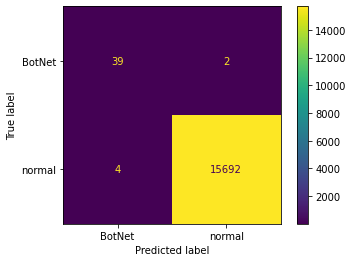

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

target_dict = {'BotNet' : 0, 
               'normal' : 1}

disp = ConfusionMatrixDisplay(cm, target_dict)
disp.plot()

In [ ]:
mcm = multilabel_confusion_matrix(y_test, y_pred)
print(mcm)

[[[15692     4]
  [    2    39]]

 [[   39     2]
  [    4 15692]]]


In [ ]:
print(cm)

[[   39     2]
 [    4 15692]]


In [ ]:
FP = cm.sum (axis = 0) - np.diag (cm) 
FN = cm.sum (axis = 1) - np.diag (cm) 
TP = np.diag (cm) 
TN = cm.sum () - (FP + FN + TP)

print('True positive: ', TP)
print('True negative: ', TN)
print('False positive: ', FP)
print('False negative: ', FN)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)

print('True positive rate: ', TPR)
print('True negative rate: ', TNR)
print('False positive rate: ', FPR)
print('False negative rate: ', FNR)

True positive:  [   39 15692]
True negative:  [15692    39]
False positive:  [4 2]
False negative:  [2 4]
True positive rate:  [0.95121951 0.99974516]
True negative rate:  [0.99974516 0.95121951]
False positive rate:  [0.00025484 0.04878049]
False negative rate:  [0.04878049 0.00025484]


In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        41
           1       1.00      1.00      1.00     15696

    accuracy                           1.00     15737
   macro avg       0.95      0.98      0.96     15737
weighted avg       1.00      1.00      1.00     15737



In [ ]:
print('Accuracy: ', acc)
print('Precision_weighted: ', precision)
print('Recall_weighted: ', recall)
print('mcc: ', mcc)
print('f2: ', f2)

Accuracy:  0.9996187329224121
Precision_weighted:  0.9996305389615018
Recall_weighted:  0.9996187329224121
mcc:  0.9286450624975998
f2:  0.9996210941079207
